## Assignment1-ML-for-NLP2
For this assignment, you will work in groups. (See group assignment below.) 
Use the samples of Twitter data posted in the Input folder (corresponding to NYT and Fox News) and do the following:


1. Data cleaning. 

Remove stopwords, links, hashtags, etc. 

2. Feature engineering.

Create popularity and engagement measures, mentions (i.e. a tweet includes @), popular hashtags, breaking news, growth of followers, an indicator if the tweet is posted by NYT, and zero if the tweet belongs to Fox News.

3. Data Exploration and Prediction
- Is there a follower-tweet relationship? 
- What are the most frequent topics tweeted about by each outlet? Are there differences in outlets?
- Is there a relationship between the sentiment of the tweet and the outlet?
- Can we predict the outlet by the text of the tweet? Use classification methods (Naive Bayes, Logistic Regression, Support Vector Classifier using Count Vectorizer, Tf-Idf, or Word Embeddings). Which method performs better? Why?
- Do the usual word analogies hold in this sample?
- Create the most representative tweet by outlet (See  https://www.youtube.com/watch?v=zFScws0mb7M&t=23m03s and the Q&A for his description of it is implemented in the algorithm.)

Bonus 10 points: Create at least two own explorations.

Create a GitHub repository with your code and invite me to it. 


In [3]:
import numpy as np
from numpy import array
import pandas as pd
df = pd.read_csv('./Inputs/FoxNews_all_tweets.csv')
df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,1367531,FoxNews,20946694,456439,NaN,NaN,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,1504847596006821894,NaN
1,1367531,FoxNews,20946694,456439,NaN,NaN,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,1504846338097221635,NaN
2,1367531,FoxNews,20946694,456439,NaN,NaN,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,1504845079344820224,NaN
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN
4,1367531,FoxNews,20946694,456439,NaN,NaN,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,1504842564117024770,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1367531,FoxNews,20946696,456439,NaN,NaN,Social media explodes following Jussie Smollet...,2022-03-11 16:45:00+00:00,20,66,94,5,1502324722264166402,NaN
1325,1367531,FoxNews,20946696,456439,NaN,NaN,Congress gets up close view of 'horrific' Russ...,2022-03-11 16:35:00+00:00,35,72,117,2,1502322205597712385,NaN
1326,1367531,FoxNews,20946696,456439,NaN,NaN,GOP lawmaker slams Biden's blame game on sky-h...,2022-03-11 16:25:00+00:00,59,160,263,6,1502319689137012740,NaN
1327,1367531,FoxNews,20946696,456439,NaN,NaN,Prince William’s comment about ‘alien’ Ukraine...,2022-03-11 16:15:00+00:00,15,38,53,6,1502317172722323456,NaN


In [8]:
df.head(100)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,1367531,FoxNews,20946694,456439,NaN,NaN,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,1504847596006821894,NaN
1,1367531,FoxNews,20946694,456439,NaN,NaN,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,1504846338097221635,NaN
2,1367531,FoxNews,20946694,456439,NaN,NaN,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,1504845079344820224,NaN
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN
4,1367531,FoxNews,20946694,456439,NaN,NaN,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,1504842564117024770,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1367531,FoxNews,20946694,456439,NaN,NaN,‘I NEED A GUINNESS’: The House speaker introdu...,2022-03-18 01:42:00+00:00,49,109,134,20,1504634189655810048,NaN
96,1367531,FoxNews,20946694,456439,NaN,NaN,Florida driver plows through preschool playgro...,2022-03-18 01:40:00+00:00,42,71,53,4,1504633686410547204,NaN
97,1367531,FoxNews,20946694,456439,NaN,NaN,Justin Bieber addresses Hailey Baldwin’s 'real...,2022-03-18 01:35:00+00:00,16,22,67,2,1504632428198957056,NaN
98,1367531,FoxNews,20946694,456439,NaN,NaN,Buck Sexton blasts Big Tech after New York Tim...,2022-03-18 01:30:00+00:00,83,73,340,3,1504631172298645504,NaN


In [4]:
df.describe()

,author_id,author_followers,author_tweets,author_description,author_location,retweets,replies,likes,quote_count,tweet_id,reference_status
count,1329.0,1.329000e+03,1329.0,0.0,0.0,1329.000000,1329.000000,1329.000000,1329.000000,1.329000e+03,0.0
mean,1367531.0,2.094670e+07,456439.0,NaN,NaN,80.906697,149.758465,393.826185,14.866065,1.503591e+18,NaN
std,0.0,1.179504e+00,0.0,NaN,NaN,196.496747,296.394579,1145.066943,31.816612,7.412145e+14,NaN
min,1367531.0,2.094669e+07,456439.0,NaN,NaN,4.000000,4.000000,21.000000,0.000000,1.502315e+18,NaN
25%,1367531.0,2.094669e+07,456439.0,NaN,NaN,23.000000,33.000000,77.000000,3.000000,1.502965e+18,NaN
50%,1367531.0,2.094670e+07,456439.0,NaN,NaN,38.000000,65.000000,138.000000,6.000000,1.503676e+18,NaN
75%,1367531.0,2.094670e+07,456439.0,NaN,NaN,68.000000,140.000000,280.000000,13.000000,1.504216e+18,NaN
max,1367531.0,2.094670e+07,456439.0,NaN,NaN,4266.000000,3851.000000,22508.000000,470.000000,1.504848e+18,NaN


In [10]:
df2 = pd.read_csv('./Inputs/nytimes_all_tweets.csv')
df2

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,807095,nytimes,52297192,466267,NaN,NaN,Hong Kong said that more than one million peop...,2022-03-18 15:45:19+00:00,83,30,160,16,1504846417063460916,NaN
1,807095,nytimes,52297192,466267,NaN,NaN,The pandemic is not yet over. But New York’s e...,2022-03-18 15:30:10+00:00,43,27,142,5,1504842606269841455,NaN
2,807095,nytimes,52297192,466267,NaN,NaN,"Alexander Chekmenev, a Ukrainian photographer,...",2022-03-18 15:20:04+00:00,76,13,303,4,1504840063397646336,NaN
3,807095,nytimes,52297192,466267,NaN,NaN,"The format of “American Song Contest,” hosted ...",2022-03-18 15:15:03+00:00,29,9,133,7,1504838803097272351,NaN
4,807095,nytimes,52297192,466267,NaN,NaN,"China’s top leader, Xi Jinping, told President...",2022-03-18 15:12:04+00:00,75,52,268,10,1504838050479751209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,807095,nytimes,52297191,466267,NaN,NaN,"Kyrylo Lysov, 22, and his girlfriend Yelyzavet...",2022-03-11 16:40:18+00:00,737,170,5277,54,1502323539197706243,NaN
619,807095,nytimes,52297191,466267,NaN,NaN,Our journalists are looking into how companies...,2022-03-11 16:30:12+00:00,32,38,150,7,1502320998636527619,NaN
620,807095,nytimes,52297191,466267,NaN,NaN,Breaking News: Alec Baldwin gave his most deta...,2022-03-11 16:18:19+00:00,59,81,227,20,1502318008844406786,NaN
621,807095,nytimes,52297191,466267,NaN,NaN,A shipwreck from 1891 has been discovered in L...,2022-03-11 16:10:04+00:00,88,15,361,16,1502315929941815305,NaN


In [2]:
#ABAy's code

# List of all hashtags

In [106]:
def return_all_hashtags(tweets):
    all_hashtags=[]
    for tweet in tweets:
        for word in tweet.split():
            if word.startswith('#'):
                all_hashtags.append(word)
    return all_hashtags

In [51]:
hashtag_list = return_all_hashtags(df2['text'])

In [109]:
hashtag_list = return_all_hashtags(df2['text'])

In [52]:
import re

In [112]:
def preprocessing_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text) #remove all non‐alphanumeric characters except white space
    words = text
    return words

In [113]:
for i in range(len(hashtag_list)):
    hashtag_list[i] = preprocessing_text(hashtag_list[i])

In [114]:
hashtag_list

['CriticsChoiceAwards', 'CriticsChoice', 'CriticsChoiceAwards', 'MeToo']

In [115]:
hashtag_set = set(hashtag_list)
hashtag_list = list(hashtag_set)
hashtag_list

['CriticsChoice', 'CriticsChoiceAwards', 'MeToo']

In [116]:
for element in hashtag_list:
    #df2['hashtag_'+element] = np.where(('#'+element) in df2.text, 1,0)
    df2['hashtag_'+element] = df2.apply(lambda x: 1 if element in x.text else 0, axis = 1)

In [103]:
for element in hashtag_list:
    #df2['hashtag_'+element] = np.where(('#'+element) in df2.text, 1,0)
    df2['hashtag1_'+element] = df2['text'].apply(lambda x: 1 if len(re.findall(element, x))>0 else 0)

In [80]:
df2['C'] = df2.apply(lambda x: 'metoo' in x.text, axis=1).astype(int)

In [97]:
text = '#criticschoiceawards kscliwec'
for element in hashtag_list:
    if element in text:
        print()


criticschoice
criticschoiceawards


In [ ]:
df2.text.apply(lambda x: 1 if len(re.findall(element, x))>0 else 0)

In [87]:
df2

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status,hashtag_criticschoice,hashtag_metoo,hashtag_criticschoiceawards,C
0,807095,nytimes,52297192,466267,NaN,NaN,Hong Kong said that more than one million peop...,2022-03-18 15:45:19+00:00,83,30,160,16,1504846417063460916,NaN,0,0,0,0
1,807095,nytimes,52297192,466267,NaN,NaN,The pandemic is not yet over. But New York’s e...,2022-03-18 15:30:10+00:00,43,27,142,5,1504842606269841455,NaN,0,0,0,0
2,807095,nytimes,52297192,466267,NaN,NaN,"Alexander Chekmenev, a Ukrainian photographer,...",2022-03-18 15:20:04+00:00,76,13,303,4,1504840063397646336,NaN,0,0,0,0
3,807095,nytimes,52297192,466267,NaN,NaN,"The format of “American Song Contest,” hosted ...",2022-03-18 15:15:03+00:00,29,9,133,7,1504838803097272351,NaN,0,0,0,0
4,807095,nytimes,52297192,466267,NaN,NaN,"China’s top leader, Xi Jinping, told President...",2022-03-18 15:12:04+00:00,75,52,268,10,1504838050479751209,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,807095,nytimes,52297191,466267,NaN,NaN,"Kyrylo Lysov, 22, and his girlfriend Yelyzavet...",2022-03-11 16:40:18+00:00,737,170,5277,54,1502323539197706243,NaN,0,0,0,0
619,807095,nytimes,52297191,466267,NaN,NaN,Our journalists are looking into how companies...,2022-03-11 16:30:12+00:00,32,38,150,7,1502320998636527619,NaN,0,0,0,0
620,807095,nytimes,52297191,466267,NaN,NaN,Breaking News: Alec Baldwin gave his most deta...,2022-03-11 16:18:19+00:00,59,81,227,20,1502318008844406786,NaN,0,0,0,0
621,807095,nytimes,52297191,466267,NaN,NaN,A shipwreck from 1891 has been discovered in L...,2022-03-11 16:10:04+00:00,88,15,361,16,1502315929941815305,NaN,0,0,0,0


In [117]:
df2.describe()

,author_id,author_followers,author_tweets,author_description,author_location,retweets,replies,likes,quote_count,tweet_id,...,hashtag_criticschoice,hashtag_metoo,hashtag_criticschoiceawards,C,hashtag1_criticschoice,hashtag1_metoo,hashtag1_criticschoiceawards,hashtag_CriticsChoice,hashtag_CriticsChoiceAwards,hashtag_MeToo
count,623.0,6.230000e+02,623.0,0.0,0.0,623.000000,623.000000,623.000000,623.000000,6.230000e+02,...,623.0,623.0,623.0,623.0,623.0,623.0,623.0,623.000000,623.000000,623.000000
mean,807095.0,5.229719e+07,466267.0,NaN,NaN,217.460674,94.502408,845.014446,34.561798,1.503705e+18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012841,0.004815,0.001605
std,0.0,2.396646e+00,0.0,NaN,NaN,550.178902,192.384829,2104.128597,83.812198,7.188598e+14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112679,0.069281,0.040064
min,807095.0,5.229719e+07,466267.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.502313e+18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,807095.0,5.229719e+07,466267.0,NaN,NaN,48.500000,26.000000,181.000000,6.000000,1.503181e+18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,807095.0,5.229719e+07,466267.0,NaN,NaN,95.000000,45.000000,341.000000,12.000000,1.503771e+18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,807095.0,5.229719e+07,466267.0,NaN,NaN,203.000000,91.500000,740.500000,28.500000,1.504286e+18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,807095.0,5.229719e+07,466267.0,NaN,NaN,8422.000000,2192.000000,33729.000000,905.000000,1.504846e+18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [62]:
aaaahashtag_list

['criticschoice', 'metoo', 'criticschoiceawards']

In [69]:
return_all_hashtags(df['text'])

[]

In [ ]:
for element in 

In [70]:
hashtag_list1 = return_all_hashtags(df2['text'])

In [71]:
hashtag_list1

['#metoo',
 '#criticschoiceawards',
 '#criticschoiceawards',
 '#criticschoiceawards.',
 '#criticschoice',
 '#criticschoice',
 '#criticschoice',
 '#criticschoice',
 '#criticschoice']

In [60]:
element="asd"
print('hashtag'+element)

hashtagasd


In [61]:
element in "asd"

True

# Tweet - Follower Relationship

In [118]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

## FoxNews data

In [124]:
df['polarity_score'] = df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
df['sentiment'] = np.where(df['polarity_score']>0.05, "Positive", 
                          np.where(df['polarity_score']< -0.05, "Negative", 'Neutral'))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

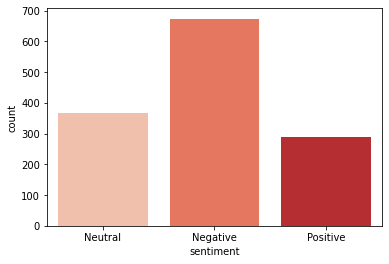

In [126]:
import seaborn as sns
sns.countplot(x='sentiment', data=df, palette="Reds")

We can see that there are more news with Negative sentiment. 

### Check correlation between the followers and polarity scores

In [127]:
df['polarity_score'].corr(df['author_followers'])

0.053717506122658056

<AxesSubplot:xlabel='author_followers', ylabel='polarity_score'>

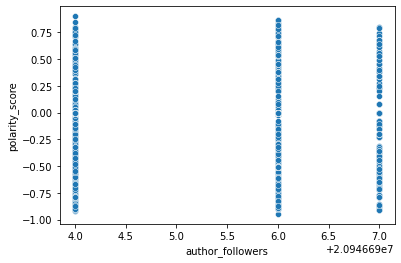

In [135]:
sns.scatterplot(data=df, x="author_followers", y="polarity_score")

As we can see, correlation is very low. Partially the reason is that there is no variability in the followers number. For such a short period, the number of followers increased and decreased several times by 1-2 followers.

## NYTimes data

In [129]:
df2['polarity_score'] = df2['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
df2['sentiment'] = np.where(df2['polarity_score']>0.05, "Positive", 
                          np.where(df2['polarity_score']< -0.05, "Negative", 'Neutral'))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

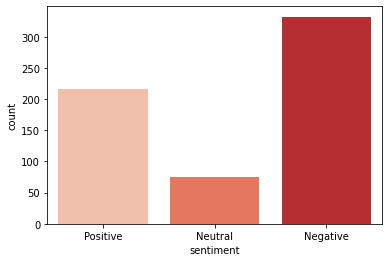

In [130]:
import seaborn as sns
sns.countplot(x='sentiment', data=df2, palette="Reds")

We can see that there are more news with Negative sentiment. 

### Check correlation between the followers and polarity scores

In [131]:
df2['polarity_score'].corr(df2['author_followers'])

-0.038558693958326055

<AxesSubplot:xlabel='author_followers', ylabel='polarity_score'>

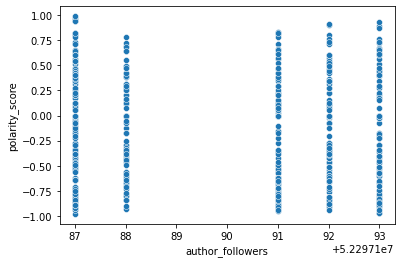

In [136]:
sns.scatterplot(data=df2, x="author_followers", y="polarity_score")

As we can see, correlation is very low. Partially the reason is that there is no variability in the followers number. For such a short period, the number of followers increased and decreased several times by 1-2 followers.